In [1]:
import geopandas as gpd
import os
import zipfile as zf
import geopandas
from shapely.geometry import shape
import gzip 
import urllib.request
import xarray as xr
import io
import shapefile
import pandas as pd
import json

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean

In [2]:
zp = zf.ZipFile('TM_WORLD_BORDERS-0.3.zip')
files_to_read = [y for y in zp.namelist() for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)]
dummy = zp.read(files_to_read[0])
dbf_file, prj_file, shp_file, shx_file = [zp.open(filename) for filename in files_to_read]
r = shapefile.Reader(shp = shp_file, shx = shx_file, dbf = dbf_file, encoding='windows-1252')
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]
for row in r.shapeRecords():
    geometry.append(shape(row.shape.__geo_interface__))
    attributes.append(dict(zip(field_names, row.record)))

In [4]:
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry)

NameError: name 'attributes' is not defined

In [9]:
gdf

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...,...,...,...,...,...,...,...,...,...,...
241,TB,BL,BLM,652,Saint Barthelemy,0,0,19,29,-63.043,18.040,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
242,GK,GG,GGY,831,Guernsey,0,0,150,154,-2.576,49.459,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
243,JE,JE,JEY,832,Jersey,0,0,150,154,-2.129,49.219,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
244,SX,GS,SGS,239,South Georgia South Sandwich Islands,0,0,0,0,-36.891,-54.209,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


Scraping does not work on my laptop now :

In [9]:
 import pandasdmx as sdmx

In [29]:
url = "https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz"
req2 = urllib.request.Request(url)
with gzip.open(urllib.request.urlopen(req2)) as resp2:
    xr_df2 = xr.open_dataset(io.BytesIO(resp2.read()))
df4 = xr_df2.to_dataframe()
dfnasa = df4.reset_index()

In [37]:
from datapackage import Package

package = Package('https://datahub.io/core/gdp-us/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'year_csv', 'quarter_csv', 'year_json', 'quarter_json', 'gdp-us_zip', 'year', 'quarter']
[[1930, Decimal('92.2'), Decimal('966.7'), Decimal('-16.0'), Decimal('-6.4')], [1931, Decimal('77.4'), Decimal('904.8'), Decimal('-23.1'), Decimal('-12.9')], [1932, Decimal('59.5'), Decimal('788.2'), Decimal('-4.0'), Decimal('-1.3')], [1933, Decimal('57.2'), Decimal('778.3'), Decimal('16.9'), Decimal('10.8')], [1934, Decimal('66.8'), Decimal('862.2'), Decimal('11.1'), Decimal('8.9')], [1935, Decimal('74.3'), Decimal('939.0'), Decimal('14.3'), Decimal('12.9')], [1936, Decimal('84.9'), Decimal('1060.5'), Decimal('9.6'), Decimal('5.1')], [1937, Decimal('93.0'), Decimal('1114.6'), Decimal('-6.1'), Decimal('-3.3')], [1938, Decimal('87.4'), Decimal('1077.7'), Decimal('7.0'), Decimal('8.0')], [1939, Decimal('93.5'), Decimal('1163.6'), Decimal('10.1'), Decimal('8.8')], [1940, Decimal('102.9'), Decimal('1266.1'), Decimal('25.7'), Decimal('17.7')], [1941, Decimal('129.4'), Decimal('1490

In [5]:
dfnasaUS = pd.read_pickle("temperature_anomalies_1980_United States.pkl")

In [6]:
dfnasaUS.sort_values(by=["time"])

,ISO2,ISO3,NAME,REGION,SUBREGION,LON,LAT,geometry,lat,lon,time,time_bnds,tempanomaly,YearMonth
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-79.0,37.0,1980-01-15,1980-02-01,0.14,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-87.0,41.0,1980-01-15,1980-01-01,0.78,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-71.0,45.0,1980-01-15,1980-02-01,0.37,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-89.0,35.0,1980-01-15,1980-02-01,0.78,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-77.0,43.0,1980-01-15,1980-02-01,0.36,1980-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-89.0,37.0,2021-04-15,2021-04-01,-3.28,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-89.0,39.0,2021-04-15,2021-05-01,-3.28,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-77.0,37.0,2021-04-15,2021-04-01,-1.39,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-87.0,35.0,2021-04-15,2021-04-01,-3.28,2021-04


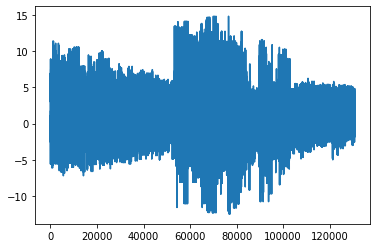

In [21]:
dfnasaUS["tempanomaly"].plot();

Let's try a nn to predict heatwaves: Input signals tmeprature but also maybe umidity and stuff FOR ALL COUNTRY 

Import GDP US DATA

In [ ]:
https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPC1&scale=left&cosd=1947-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-05-24&revision_date=2021-05-24&nd=1947-01-01

In [12]:
GDPus = pd.read_csv("GDPC12.csv")

In [48]:
GDPus

,DATE,GDPC1
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017
...,...,...
292,2020-01-01,19010.848
293,2020-04-01,17302.511
294,2020-07-01,18596.521
295,2020-10-01,18794.426


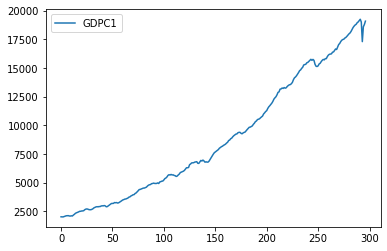

In [49]:
GDPus.plot();

In [13]:
# convert to period
GDPus['DATE'] = pd.to_datetime(GDPus['DATE']).dt.to_period('M')

# set Date as index and resample
GDPus2 = GDPus.set_index('DATE').resample('M').interpolate()

In [75]:
GDPus2

,GDPC1
DATE,
1947-01,2033.061000
1947-02,2031.253667
1947-03,2029.446333
1947-04,2027.639000
1947-05,2026.243333
...,...
2020-09,18728.457667
2020-10,18794.426000
2020-11,18892.140000


In [14]:
GDPus2 = GDPus2.reset_index()

In [15]:
old_names = ['DATE', 'GDPC1'] 
new_names = ['YearMonth', 'GDP']
GDPus2.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [16]:
GDPus2

,YearMonth,GDP
0,1947-01,2033.061000
1,1947-02,2031.253667
2,1947-03,2029.446333
3,1947-04,2027.639000
4,1947-05,2026.243333
...,...,...
884,2020-09,18728.457667
885,2020-10,18794.426000
886,2020-11,18892.140000
887,2020-12,18989.854000


Merge the 2 datasets

In [39]:
df_outer = pd.merge([GDPus2, dfnasaUS], how = 'inner', on = "YearMonth")

TypeError: merge() missing 1 required positional argument: 'right'

In [40]:
dfnasaUS.merge(df, how = "right")

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [31]:
dfnasaUS

,ISO2,ISO3,NAME,REGION,SUBREGION,LON,LAT,geometry,lat,lon,time,time_bnds,tempanomaly,YearMonth
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-79.0,37.0,1980-01-15,1980-02-01,0.14,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-85.0,43.0,1980-01-15,1980-01-01,0.78,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-71.0,43.0,1980-01-15,1980-01-01,0.43,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-75.0,41.0,1980-01-15,1980-01-01,0.39,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-85.0,31.0,1980-01-15,1980-01-01,0.78,1980-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-83.0,37.0,2021-04-15,2021-04-01,-3.28,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-81.0,39.0,2021-04-15,2021-05-01,-0.78,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-79.0,43.0,2021-04-15,2021-05-01,-0.86,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-87.0,43.0,2021-04-15,2021-05-01,-3.28,2021-04


In [32]:
GDPus2

,YearMonth,GDP
0,1947-01,2033.061000
1,1947-02,2031.253667
2,1947-03,2029.446333
3,1947-04,2027.639000
4,1947-05,2026.243333
...,...,...
884,2020-09,18728.457667
885,2020-10,18794.426000
886,2020-11,18892.140000
887,2020-12,18989.854000
